## Telecom Churn

Problem Statement :

Telecom Industry : 
- With the Given predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. 
- In telecom terminology, this is referred to as churning and not churning, respectively.

Requirement :
- The company is looking us to analyse customer-level data of a leading telecom firm.
- We are required to build a predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Objective/Goal:
The company wants to know:
- To retaining high profitable customers is the number one business goal.
- To identify important variables that are strong predictors of churn.
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


## Telecom Churn Prediction - Assignment Solution

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Filtering High Value Customer
- Drive Churn
- Data preparation
- Model building with Good Predictions & with Good interpretability 
- Model Evaluation

#### Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
# Importing  datasets
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Data Exploration

In [3]:
# Let's check the dimensions of the dataframe
churn_data.shape

(99999, 226)

In [4]:
#Getting the info of the dataframe
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
#Describing teh data set
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
## Checking for Duplicate records
churn_data[churn_data.duplicated()]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


In [7]:
# Checking the percentage of missing values
#round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)

churn_data.isna().mean().round(4) * 100

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

#### summary of the dataset: 
- 99999 rows,
- 226 columns,
- No Duplicae,
- Columns having null values
- Varibales having Outliers.

### DataCleaning 

### Imputation Techniques to handle Missing Values

- Since we are not dealing with time serious so Dropping the date columns
- Dropping the Columns having more than 35% of Missing values
- Imputing zero to the columns ,whose missing values is Zero 
- removing mising values of the Columns having < 2% of Missing Values
- Rest Columns are replaced with Mean values of that column.

In [8]:
## Get List of Varibables and their missing percentage values n desceding order

def missing(dff):
    print((churn_data.isna().mean().round(4) * 100).sort_values(ascending=False))
    #print(round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

missing(churn_data)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
                            ...  
last_day_rch_amt_6           0.00
last_day_rch_amt_7           0.00
last_day_rch_amt_8           0.00
last_day_rch_amt_9           0.00
mobile_number                0.00
Length: 226, dtype: float64


### Dropping Variables with high  missing percentage  more than 35%

In [9]:
pct_null = (churn_data.isna().mean().round(4) * 100).sort_values(ascending=False)
print(pct_null)
missing_features = pct_null[pct_null > 35].index
print(missing_features)
churn_data.drop(missing_features, axis=1, inplace=True)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
                            ...  
last_day_rch_amt_6           0.00
last_day_rch_amt_7           0.00
last_day_rch_amt_8           0.00
last_day_rch_amt_9           0.00
mobile_number                0.00
Length: 226, dtype: float64
Index(['count_rech_2g_6', 'date_of_last_rech_data_6', 'count_rech_3g_6',
       'av_rech_amt_data_6', 'max_rech_data_6', 'total_rech_data_6',
       'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'arpu_3g_7',
       'count_rech_2g_7', 'fb_user_7', 'count_rech_3g_7', 'arpu_2g_7',
       'av_rech_amt_data_7', 'max_rech_data_7', 'night_pck_user_7',
       'total_rech_data_7', 'date_of_last_rech_data_7', 'night_pck_user_9',
       'date_of_last_rech_data_9', 'fb_user_9', 'arpu_2g_9', 'max_rech_data_9',
       'arpu_3g_9', 'total_rech_data_9', 'av_rech_amt_data_9',
       'count_rech_

### Replacing '"ZERO"' to Variables whose missing value is '0'

In [10]:
churn_data[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']] = churn_data[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].fillna(0)

### Dropping the rows having < 2% of Missing Values from the column

In [11]:
datecolumns = ['date_of_last_rech_8','date_of_last_rech_7','last_date_of_month_6','last_date_of_month_9','date_of_last_rech_6','last_date_of_month_8','last_date_of_month_7','date_of_last_rech_9']
churn_data.drop(datecolumns,inplace=True,axis=1)

### Replacing with its MEAN values

In [12]:
churn_data = churn_data.fillna(churn_data.mean())

In [13]:
# Checking the percentage of missing values
round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)

mobile_number     0.0
circle_id         0.0
loc_og_t2o_mou    0.0
std_og_t2o_mou    0.0
loc_ic_t2o_mou    0.0
                 ... 
aon               0.0
aug_vbc_3g        0.0
jul_vbc_3g        0.0
jun_vbc_3g        0.0
sep_vbc_3g        0.0
Length: 178, dtype: float64

###  Exploratory Data Analysis

In [14]:
churn_data.shape

(99999, 178)

In [15]:
# Create correlation matrix
corr_matrix = churn_data.corr().abs()

list_columns = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.9
corr_df = [column for column in list_columns.columns if any(list_columns[column] > 0.9)]

print(corr_df)

['isd_og_mou_7', 'isd_og_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9']


###  Below columns have the correlation greater than 0.9
['isd_og_mou_7', 'isd_og_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9']

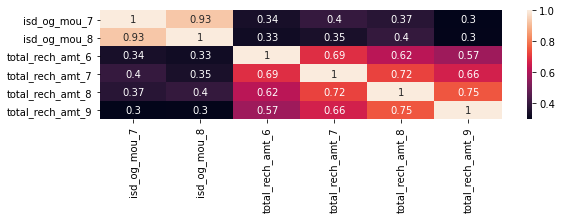

In [16]:
## Finding the correction of the below variables
fig, ax = plt.subplots(figsize=(9,2))
sns.heatmap(churn_data[corr_df].corr(),annot = True)
plt.show()

## High Value Customer

In [17]:
# Getting Total Average recharge amount for both June & July month
churn_data['avg_reach_amt_6_7'] = (churn_data['total_rech_amt_6'] + churn_data['total_rech_amt_7'])/2

In [18]:
## get 70th Percentile Amount from the Total Average Recharge amount
perc_70th = churn_data['avg_reach_amt_6_7'].quantile(.7)
print("70th Percentile of the Total Average Recharge amount : " + str(perc_70th))

70th Percentile of the Total Average Recharge amount : 368.5


In [19]:
hvc = churn_data['avg_reach_amt_6_7'] >=  perc_70th
hvc_churn_data = churn_data[hvc]
print(hvc_churn_data.shape)
hvc_churn_data.head()

(30011, 179)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_reach_amt_6_7
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


#### 30011 Customer have the average amount more than 70th percentile

### Drive Chrun from ChrunPhase (9thMonth)

In [20]:
##### Drive Churn using 9th month data
hvc_churn_data['Target_value']=np.where(((hvc_churn_data['total_ic_mou_9']==0) & (hvc_churn_data['total_og_mou_9']==0) & (hvc_churn_data['monthly_2g_9']==0) & (hvc_churn_data['monthly_3g_9']==0)),1,0)

In [21]:
hvc_churn_data['Target_value'].value_counts()

0    27354
1     2657
Name: Target_value, dtype: int64

In [22]:
(hvc_churn_data['Target_value'].value_counts()/hvc_churn_data['Target_value'].count())*100

0    91.14658
1     8.85342
Name: Target_value, dtype: float64

In [23]:
# Since we have used 9th month data to derive target column dropping the columns related to 9th month
hvc_churn_data.drop(['arpu_9' ,'onnet_mou_9' ,'offnet_mou_9' ,'roam_ic_mou_9' ,'roam_og_mou_9' ,'loc_og_t2t_mou_9' ,'loc_og_t2m_mou_9' ,'loc_og_t2f_mou_9' ,'loc_og_t2c_mou_9' ,'loc_og_mou_9' ,'std_og_t2t_mou_9' ,'std_og_t2m_mou_9' ,'std_og_t2f_mou_9' ,'std_og_t2c_mou_9' ,'std_og_mou_9' ,'isd_og_mou_9' ,'spl_og_mou_9' ,'og_others_9' ,'total_og_mou_9' ,'loc_ic_t2t_mou_9' ,'loc_ic_t2m_mou_9' ,'loc_ic_t2f_mou_9' ,'loc_ic_mou_9' ,'std_ic_t2t_mou_9' ,'std_ic_t2m_mou_9' ,'std_ic_t2f_mou_9' ,'std_ic_t2o_mou_9' ,'std_ic_mou_9' ,'total_ic_mou_9' ,'spl_ic_mou_9' ,'isd_ic_mou_9' ,'ic_others_9' ,'total_rech_num_9' ,'total_rech_amt_9' ,'max_rech_amt_9'  ,'vol_2g_mb_9' ,'vol_3g_mb_9' ,'monthly_2g_9' ,'sachet_2g_9' ,'monthly_3g_9' ,'sachet_3g_9'],axis=1,inplace=True)

#### Therefore 2657 churned customers have not used either Call or Internet in the month of September

In [24]:
hvc_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_reach_amt_6_7,Target_value
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,...,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0


### Driving Variables

In [25]:
hvc_churn_data['Action_Target_value']=np.where(((hvc_churn_data['total_ic_mou_8']==0) & (hvc_churn_data['total_og_mou_8']==0) & (hvc_churn_data['monthly_2g_8']==0) & (hvc_churn_data['monthly_3g_8']==0)),1,0)
(hvc_churn_data['Action_Target_value'].value_counts()/hvc_churn_data['Action_Target_value'].count())*100

0    94.002199
1     5.997801
Name: Action_Target_value, dtype: float64

##### Therefore- ~6% of customers are not used either calls or internet in the ACTION phase Month- These customers are high chance of switch the provider in near future.

In [26]:
churn_data['difference_avg_reach_amt_btw_Good_Action'] = churn_data['avg_reach_amt_6_7'] - churn_data['total_rech_amt_8']
perc_70th = churn_data['difference_avg_reach_amt_btw_Good_Action'].quantile(.7)
print("70th Percentile of the differnce Average Recharge amount between Good & Action Phase : " + str(perc_70th))

diff = churn_data['difference_avg_reach_amt_btw_Good_Action'] <=  perc_70th
diff_churn_data = churn_data[diff]
print(diff_churn_data.shape)
diff_churn_data.head()

70th Percentile of the differnce Average Recharge amount between Good & Action Phase : 86.5
(70036, 180)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_reach_amt_6_7,difference_avg_reach_amt_btw_Good_Action
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,132.395875,...,0,0,0,968,30.4,0.0,101.2,3.58,307.0,55.0
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.110000,...,0,0,0,1006,0.0,0.0,0.0,0.00,229.0,-54.0
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.910000,...,0,0,0,2491,0.0,0.0,0.0,0.00,270.0,-331.0
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.310000,...,0,0,0,1526,0.0,0.0,0.0,0.00,273.0,-14.0
5,7000286308,109,0.0,0.0,0.0,50.258,58.810,83.386,170.826,50.160000,...,0,0,0,1471,0.0,0.0,0.0,0.00,60.0,-70.0


##### Therefore- 70036 Customer have the average amount less than 70th percentile- These customers are high chance of switch the provider in near future.

### Data Preparation

#### EDA

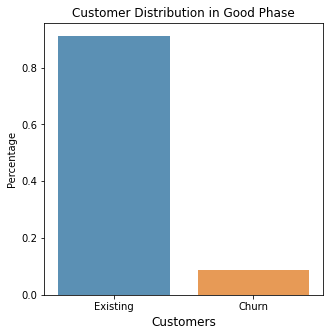

In [27]:
Churn_rate = hvc_churn_data['Target_value'].value_counts() / hvc_churn_data.shape[0]
plt.figure(figsize=(5,5))
sns.barplot(Churn_rate.index.map({0:'Existing',1:"Churn"}),Churn_rate.values, alpha=0.8)
plt.title('Customer Distribution in Good Phase')
plt.ylabel('Percentage')
plt.xlabel('Customers', fontsize=12)
plt.show()

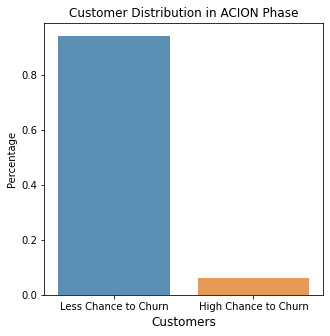

In [28]:
Churn_rate = hvc_churn_data['Action_Target_value'].value_counts() / hvc_churn_data.shape[0]
plt.figure(figsize=(5,5))
sns.barplot(Churn_rate.index.map({0:'Less Chance to Churn',1:"High Chance to Churn"}),Churn_rate.values, alpha=0.8)
plt.title('Customer Distribution in ACION Phase')
plt.ylabel('Percentage')
plt.xlabel('Customers', fontsize=12)
plt.show()

#### Checking for Outliers

In [29]:
hvc_churn_data.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_reach_amt_6_7,Target_value,Action_Target_value
count,3.001100e+04,30011.0,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,7.001223e+09,109.0,0.0,0.0,0.0,587.284404,589.135427,534.857433,297.428519,305.692786,...,0.150212,0.140415,1264.064776,129.439626,135.127102,121.360548,6.562685,696.664356,0.088534,0.059978
std,6.846405e+05,0.0,0.0,0.0,0.0,442.722413,462.897814,492.259586,460.077570,481.112797,...,0.969286,0.974727,975.263117,390.478591,408.024394,389.726031,48.638658,488.782088,0.284075,0.237450
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,368.500000,0.000000,0.000000
25%,7.000641e+09,109.0,0.0,0.0,0.0,364.161000,365.004500,289.609500,43.510000,43.260000,...,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,0.000000
50%,7.001232e+09,109.0,0.0,0.0,0.0,495.682000,493.561000,452.091000,131.010000,130.440000,...,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,568.500000,0.000000,0.000000
75%,7.001814e+09,109.0,0.0,0.0,0.0,703.922000,700.788000,671.150000,353.310000,359.925000,...,0.000000,0.000000,1924.000000,1.600000,1.990000,0.000000,0.000000,795.500000,0.000000,0.000000
95%,7.002287e+09,109.0,0.0,0.0,0.0,1240.793500,1261.421500,1258.555500,1153.970000,1208.175000,...,1.000000,1.000000,3179.000000,818.750000,845.315000,761.740000,18.635000,1406.000000,1.000000,1.000000
99%,7.002387e+09,109.0,0.0,0.0,0.0,1983.089500,1999.374500,1987.934400,2166.370000,2220.367000,...,3.000000,3.000000,3651.000000,1822.115000,1941.598000,1866.386000,173.662000,2216.300000,1.000000,1.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,35.000000,41.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,37762.500000,1.000000,1.000000


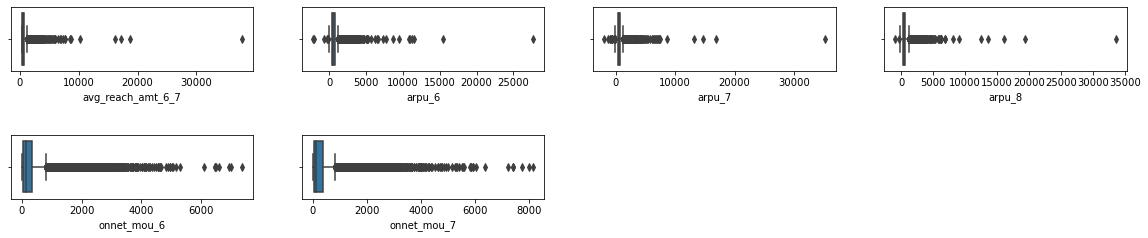

In [30]:
## checking for the few outliers columns
plt.figure(figsize = (20, 20))
feature = ['avg_reach_amt_6_7','arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7']
for i in enumerate(feature):
    plt.subplot(9,4,i[0]+1)
    plt.subplots_adjust( hspace=1)
    sns.boxplot(hvc_churn_data[i[1]])

#### Treating Outlier : 
- Impact  : May give misleading results .
- Decision  : We believe dropping data is always a harsh step and should be taken only in extreme conditions when    we’re very sure that the outlier is a measurement error, which we generally do not know.When we drop data, we lose information in terms of the variability in data. Hence we can Cap them.
        

In [31]:
## Capping  : I have less outlier 
for col in hvc_churn_data.columns:
    percentiles = hvc_churn_data[col].quantile([0.01,0.99]).values
    hvc_churn_data[col][hvc_churn_data[col] <= percentiles[0]] = percentiles[0]
    hvc_churn_data[col][hvc_churn_data[col] >= percentiles[1]] = percentiles[1]

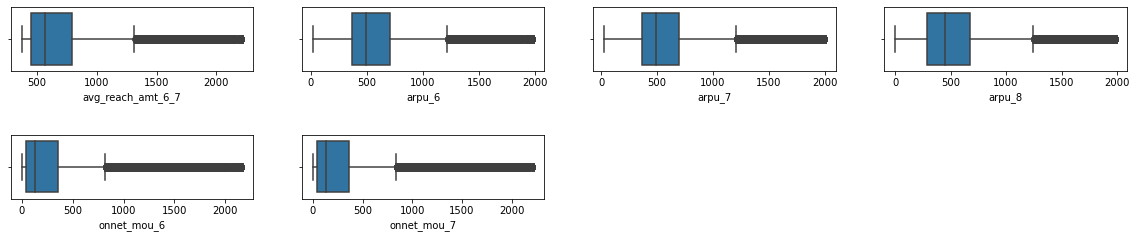

In [32]:
## checking for the few outliers columns
plt.figure(figsize = (20, 20))
feature = ['avg_reach_amt_6_7','arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7']
for i in enumerate(feature):
    plt.subplot(9,4,i[0]+1)
    plt.subplots_adjust( hspace=1)
    sns.boxplot(hvc_churn_data[i[1]])

##### Therefore, After treating the outlier using Capping Method, still we can see few more outliers. Now we need to take a call on whether to keep the outlier or remove the outliers. We already know  that  removing data's may lead to weaken the model and less outliers - hence we decided to keep the outlier without removing them from the dataset for my better Analysis/Model.


#### Spliting the data set 

In [33]:
hvc_churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_reach_amt_6_7,Target_value,Action_Target_value
count,3.001100e+04,30011.0,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,7.001223e+09,109.0,0.0,0.0,0.0,577.817770,579.655531,524.418269,288.751839,296.394655,...,0.103162,0.093932,1263.367832,120.429564,126.036879,112.177812,4.496669,685.780707,0.088534,0.059978
std,6.841865e+05,0.0,0.0,0.0,0.0,335.972187,338.136038,370.677425,404.207801,419.083226,...,0.442593,0.430904,973.221741,318.459109,337.180897,312.975849,22.484204,347.606537,0.284075,0.237450
min,7.000028e+09,109.0,0.0,0.0,0.0,18.231900,25.782700,0.000000,0.000000,0.000000,...,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.000000,371.000000,0.000000,0.000000
25%,7.000641e+09,109.0,0.0,0.0,0.0,364.161000,365.004500,289.609500,43.510000,43.260000,...,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,0.000000
50%,7.001232e+09,109.0,0.0,0.0,0.0,495.682000,493.561000,452.091000,131.010000,130.440000,...,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,568.500000,0.000000,0.000000
75%,7.001814e+09,109.0,0.0,0.0,0.0,703.922000,700.788000,671.150000,353.310000,359.925000,...,0.000000,0.000000,1924.000000,1.600000,1.990000,0.000000,0.000000,795.500000,0.000000,0.000000
max,7.002387e+09,109.0,0.0,0.0,0.0,1983.089500,1999.374500,1987.934400,2166.370000,2220.367000,...,3.000000,3.000000,3651.000000,1822.115000,1941.598000,1866.386000,173.662000,2216.300000,1.000000,1.000000


In [34]:
## Test-Train Split
X = hvc_churn_data.drop(['mobile_number','Target_value'], axis=1)
X.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_reach_amt_6_7,Action_Target_value
7,109,0.0,0.0,0.0,1069.180,1349.8500,1987.9344,57.84,54.68,52.29,...,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,0
8,109,0.0,0.0,0.0,378.721,492.2230,137.3620,413.69,351.03,35.08,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,109,0.0,0.0,0.0,492.846,205.6710,593.2600,501.76,108.39,534.24,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,109,0.0,0.0,0.0,430.975,299.8690,187.8940,50.51,74.01,70.61,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,109,0.0,0.0,0.0,690.008,25.7827,25.4990,1185.91,9.28,7.79,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,1


In [35]:
y = hvc_churn_data['Target_value']
y.head()

7     1
8     0
13    0
16    0
17    0
Name: Target_value, dtype: int32

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_reach_amt_6_7,Action_Target_value
4715,109,0.0,0.0,0.0,331.304,480.315,386.671,336.33,564.78,424.11,...,0,0,0,353,0.00,0.00,0.00,0.00,461.5,0
15222,109,0.0,0.0,0.0,320.013,508.681,480.398,110.08,27.54,131.03,...,0,0,0,1076,170.16,67.21,48.78,12.56,464.0,0
60145,109,0.0,0.0,0.0,289.191,802.774,562.645,26.19,83.34,84.73,...,0,0,0,2282,0.00,0.00,0.00,0.00,615.5,0
62445,109,0.0,0.0,0.0,491.912,570.752,544.894,177.03,419.24,108.21,...,0,0,0,2613,0.00,0.00,0.00,0.00,630.0,0
88349,109,0.0,0.0,0.0,631.214,596.405,277.594,118.18,239.38,63.86,...,0,0,0,439,0.00,0.00,0.00,0.00,700.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40233,109,0.0,0.0,0.0,555.219,230.608,447.315,1096.18,558.74,732.76,...,0,0,0,235,0.00,0.00,0.00,0.00,430.0,0
81418,109,0.0,0.0,0.0,235.837,239.914,340.414,5.96,115.73,119.14,...,0,0,0,1527,0.00,0.00,0.00,0.00,454.5,0
47174,109,0.0,0.0,0.0,405.651,504.837,524.241,29.54,59.14,36.88,...,0,0,0,877,0.00,0.00,0.00,0.00,515.0,0
77737,109,0.0,0.0,0.0,510.765,561.266,542.495,828.53,700.56,620.33,...,0,0,0,844,0.00,0.00,0.00,0.00,608.0,0


### Building the Model

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

list_columns=X_train.columns

X_train[list_columns]= scaler.fit_transform(X_train[list_columns])
X_train.shape

(21007, 138)

### Treating IMBALANCE Dataset using SMOTE

- Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

- The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

In [39]:
# SMOTE
from imblearn import under_sampling, over_sampling
from collections import Counter
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)

In [40]:
## Before applying IMBALANCE
print(sorted(Counter(y_train).items()))

[(0, 19148), (1, 1859)]


In [41]:
### After Treating IMBALANCE
print(sorted(Counter(y_resampled_smt).items()))

[(0, 19148), (1, 19148)]


##### Then the dataset is transformed using the SMOTE and the new class distribution is summarized, showing a balanced distribution now with 19148 .

In [42]:
## Spilting the data after imbalance treatment
X_train=X_resampled_smt.copy()
y_train=y_resampled_smt.copy()
X_test_pca=X_test.copy()
y_test_pca=y_test.copy()
X_train_pca=X_train.copy()
y_train_pca=y_train.copy()

### Buliding the FIRST model Without PCA using logisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
logreg = LogisticRegression()

In [44]:
### Applying RFEto select top 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)   
rfe = rfe.fit(X_train, y_train)

In [45]:
rfe.support_

array([False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,

In [46]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('circle_id', False, 124),
 ('loc_og_t2o_mou', False, 123),
 ('std_og_t2o_mou', False, 122),
 ('loc_ic_t2o_mou', False, 121),
 ('arpu_6', False, 101),
 ('arpu_7', False, 18),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 27),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 13),
 ('offnet_mou_6', False, 29),
 ('offnet_mou_7', False, 8),
 ('offnet_mou_8', False, 12),
 ('roam_ic_mou_6', False, 107),
 ('roam_ic_mou_7', False, 67),
 ('roam_ic_mou_8', False, 86),
 ('roam_og_mou_6', False, 52),
 ('roam_og_mou_7', False, 17),
 ('roam_og_mou_8', False, 14),
 ('loc_og_t2t_mou_6', False, 31),
 ('loc_og_t2t_mou_7', False, 34),
 ('loc_og_t2t_mou_8', False, 11),
 ('loc_og_t2m_mou_6', False, 80),
 ('loc_og_t2m_mou_7', False, 10),
 ('loc_og_t2m_mou_8', False, 50),
 ('loc_og_t2f_mou_6', False, 85),
 ('loc_og_t2f_mou_7', False, 36),
 ('loc_og_t2f_mou_8', False, 49),
 ('loc_og_t2c_mou_6', False, 113),
 ('loc_og_t2c_mou_7', False, 82),
 ('loc_og_t2c_mou_8', False, 66),
 ('loc_og_mou_6', False, 30),
 (

In [47]:
col = X_train.columns[rfe.support_]

In [48]:
X_train.columns[~rfe.support_]

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_reach_amt_6_7'],
      dtype='object', length=123)

In [49]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Target_value   No. Observations:                38296
Model:                            GLM   Df Residuals:                    38280
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13281.
Date:                Mon, 12 Oct 2020   Deviance:                       26562.
Time:                        17:28:03   Pearson chi2:                 1.95e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.3099      0.037    -63.080      0.000      -2.382      -2.238
arpu_8                  0.2543      0.025      9.987      0.000       0.204       0.304
onnet_mou_7             0.8023      0.055     14.460      0.000       0.694       0.911
std_og_t2t_mou_7       -0.5595      0.053    -10.483      0.000      -0.664      -0.455
std_og_mou_8            1.6314      0.079     20.568      0.000       1.476       1.787
total_og_mou_8         -2.2211      0.090    -24.634      0.000      -2.398      -2.044
loc_ic_t2m_mou_6        0.7308      0.057     12.785      0.000       0.619       0.843
loc_ic_t2m_mou_8       -0.7141      0.058    -12.318      0.000      -0.828      -0.601
loc_ic_mou_6           -0.6830      0.064    -10.640      0.000      -0.809      -0.557
loc_ic_mou_7            0.6410      0.043     14.788      0.000       0.556       0.726
total_ic_mou_8         -0.7848      0.051    -15.295      0.000      -0.885      -0.684
spl_ic_mou_8           -0.5378      0.030    -18.199      0.000      -0.596      -0.480
last_day_rch_amt_9     -2.1987      0.046    -47.323      0.000      -2.290      -2.108
monthly_2g_8           -0.4733      0.027    -17.327      0.000      -0.527      -0.420
sep_vbc_3g             -0.8332      0.064    -13.081      0.000      -0.958      -0.708
Action_Target_value     0.7433      0.018     40.249      0.000       0.707       0.779
=======================================================================================
"""

In [50]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.479015
1    0.053240
2    0.005484
3    0.374682
4    0.030335
5    0.009343
6    0.193246
7    0.017874
8    0.018019
9    0.022202
dtype: float64

In [51]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47901525, 0.05323975, 0.00548414, 0.37468192, 0.03033473,
       0.00934342, 0.1932456 , 0.01787426, 0.01801871, 0.02220184])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [52]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.479015,0
1,0,0.053240,1
2,0,0.005484,2
3,0,0.374682,3
4,0,0.030335,4


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [53]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.479015,0,0
1,0,0.053240,1,0
2,0,0.005484,2,0
3,0,0.374682,3,0
4,0,0.030335,4,0


In [54]:
from sklearn import metrics

In [55]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[16095  3053]
 [ 2216 16932]]


In [56]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8624138291205348


#### Checking VIFs

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,10.76
7,loc_ic_mou_6,9.22
2,std_og_t2t_mou_7,8.75
1,onnet_mou_7,8.53
5,loc_ic_t2m_mou_6,7.59
3,std_og_mou_8,7.30
9,total_ic_mou_8,4.75
6,loc_ic_t2m_mou_8,4.67
8,loc_ic_mou_7,4.44
0,arpu_8,2.85


###### There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'total_og_mou_8' has the highest VIF. So let's start by dropping that.

In [59]:
col = col.drop('total_og_mou_8', 1)
col

Index(['arpu_8', 'onnet_mou_7', 'std_og_t2t_mou_7', 'std_og_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_9', 'monthly_2g_8',
       'sep_vbc_3g', 'Action_Target_value'],
      dtype='object')

In [60]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Target_value   No. Observations:                38296
Model:                            GLM   Df Residuals:                    38281
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13660.
Date:                Mon, 12 Oct 2020   Deviance:                       27321.
Time:                        17:28:06   Pearson chi2:                 9.42e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.1554      0.035    -61.595      0.000      -2.224      -2.087
arpu_8                  0.0258      0.023      1.132      0.258      -0.019       0.071
onnet_mou_7            -0.0253      0.040     -0.639      0.523      -0.103       0.052
std_og_t2t_mou_7        0.1989      0.040      4.991      0.000       0.121       0.277
std_og_mou_8           -0.2056      0.025     -8.297      0.000      -0.254      -0.157
loc_ic_t2m_mou_6        0.6673      0.056     11.928      0.000       0.558       0.777
loc_ic_t2m_mou_8       -1.0555      0.058    -18.064      0.000      -1.170      -0.941
loc_ic_mou_6           -0.6208      0.062     -9.942      0.000      -0.743      -0.498
loc_ic_mou_7            0.6719      0.042     15.864      0.000       0.589       0.755
total_ic_mou_8         -0.9653      0.054    -17.912      0.000      -1.071      -0.860
spl_ic_mou_8           -0.5148      0.028    -18.127      0.000      -0.570      -0.459
last_day_rch_amt_9     -2.2026      0.046    -47.850      0.000      -2.293      -2.112
monthly_2g_8           -0.4520      0.027    -16.772      0.000      -0.505      -0.399
sep_vbc_3g             -0.8024      0.063    -12.787      0.000      -0.925      -0.679
Action_Target_value     0.8870      0.018     48.929      0.000       0.851       0.923
=======================================================================================
"""

In [61]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.444698,0,0
1,0,0.058289,1,0
2,0,0.009343,2,0
3,0,0.316624,3,0
4,0,0.029087,4,0


In [62]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8557551702527679


In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,loc_ic_mou_6,9.21
4,loc_ic_t2m_mou_6,7.58
2,std_og_t2t_mou_7,6.85
1,onnet_mou_7,6.27
8,total_ic_mou_8,4.71
5,loc_ic_t2m_mou_8,4.52
7,loc_ic_mou_7,4.44
0,arpu_8,2.45
3,std_og_mou_8,2.03
13,Action_Target_value,1.71


In [64]:
# Let's drop onnet_mou_7 since it has a high VIF
col = col.drop('loc_ic_mou_6')
col

Index(['arpu_8', 'onnet_mou_7', 'std_og_t2t_mou_7', 'std_og_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_9', 'monthly_2g_8',
       'sep_vbc_3g', 'Action_Target_value'],
      dtype='object')

In [65]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Target_value   No. Observations:                38296
Model:                            GLM   Df Residuals:                    38282
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13711.
Date:                Mon, 12 Oct 2020   Deviance:                       27422.
Time:                        17:28:07   Pearson chi2:                 9.34e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.1402      0.035    -61.425      0.000      -2.208      -2.072
arpu_8                  0.0248      0.023      1.090      0.276      -0.020       0.069
onnet_mou_7            -0.0832      0.040     -2.105      0.035      -0.161      -0.006
std_og_t2t_mou_7        0.2537      0.040      6.379      0.000       0.176       0.332
std_og_mou_8           -0.1995      0.025     -8.059      0.000      -0.248      -0.151
loc_ic_t2m_mou_6        0.2218      0.033      6.740      0.000       0.157       0.286
loc_ic_t2m_mou_8       -0.8942      0.056    -15.899      0.000      -1.004      -0.784
loc_ic_mou_7            0.4814      0.038     12.796      0.000       0.408       0.555
total_ic_mou_8         -1.0833      0.054    -20.132      0.000      -1.189      -0.978
spl_ic_mou_8           -0.5167      0.029    -18.099      0.000      -0.573      -0.461
last_day_rch_amt_9     -2.2004      0.046    -47.850      0.000      -2.291      -2.110
monthly_2g_8           -0.4565      0.027    -16.957      0.000      -0.509      -0.404
sep_vbc_3g             -0.7970      0.063    -12.733      0.000      -0.920      -0.674
Action_Target_value     0.8619      0.018     48.223      0.000       0.827       0.897
=======================================================================================
"""

In [66]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.426789,0,0
1,0,0.060649,1,0
2,0,0.006859,2,0
3,0,0.299195,3,0
4,0,0.028832,4,0


In [67]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8559640693545018


In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,std_og_t2t_mou_7,6.68
1,onnet_mou_7,6.13
7,total_ic_mou_8,4.44
5,loc_ic_t2m_mou_8,4.08
6,loc_ic_mou_7,3.56
4,loc_ic_t2m_mou_6,2.50
0,arpu_8,2.44
3,std_og_mou_8,2.02
12,Action_Target_value,1.68
9,last_day_rch_amt_9,1.26


In [69]:
# Let's drop onnet_mou_7 since it has a high VIF
col = col.drop('std_og_t2t_mou_7')
col

Index(['arpu_8', 'onnet_mou_7', 'std_og_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_9', 'monthly_2g_8', 'sep_vbc_3g',
       'Action_Target_value'],
      dtype='object')

In [70]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Target_value   No. Observations:                38296
Model:                            GLM   Df Residuals:                    38283
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13732.
Date:                Mon, 12 Oct 2020   Deviance:                       27464.
Time:                        17:28:08   Pearson chi2:                 1.01e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.1432      0.035    -61.481      0.000      -2.212      -2.075
arpu_8                 -0.0011      0.022     -0.047      0.963      -0.045       0.043
onnet_mou_7             0.1407      0.017      8.132      0.000       0.107       0.175
std_og_mou_8           -0.1472      0.023     -6.345      0.000      -0.193      -0.102
loc_ic_t2m_mou_6        0.2289      0.033      6.956      0.000       0.164       0.293
loc_ic_t2m_mou_8       -0.8737      0.056    -15.476      0.000      -0.984      -0.763
loc_ic_mou_7            0.4452      0.037     11.966      0.000       0.372       0.518
total_ic_mou_8         -1.1133      0.054    -20.582      0.000      -1.219      -1.007
spl_ic_mou_8           -0.5206      0.029    -18.205      0.000      -0.577      -0.465
last_day_rch_amt_9     -2.2043      0.046    -47.976      0.000      -2.294      -2.114
monthly_2g_8           -0.4557      0.027    -16.925      0.000      -0.508      -0.403
sep_vbc_3g             -0.7944      0.063    -12.689      0.000      -0.917      -0.672
Action_Target_value     0.8552      0.018     47.963      0.000       0.820       0.890
=======================================================================================
"""

In [71]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.410486,0,0
1,0,0.058674,1,0
2,0,0.006350,2,0
3,0,0.353789,3,0
4,0,0.027537,4,0


In [72]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8548151242949655


In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_ic_mou_8,4.43
4,loc_ic_t2m_mou_8,4.05
5,loc_ic_mou_7,3.48
3,loc_ic_t2m_mou_6,2.50
0,arpu_8,2.35
2,std_og_mou_8,1.82
11,Action_Target_value,1.67
1,onnet_mou_7,1.34
8,last_day_rch_amt_9,1.26
9,monthly_2g_8,1.08


##### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [74]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[15921,  3227],
       [ 2333, 16815]], dtype=int64)

In [75]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8548151242949655

## Metrics beyond simply accuracy

In [76]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [77]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8781595989137246

In [78]:
# Let us calculate specificity
TN / float(TN+FP)

0.8314706496762064

In [79]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1685293503237936


In [80]:
# positive predictive value 
print (TP / float(TP+FP))

0.838988124937631


In [81]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8721923961871371


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

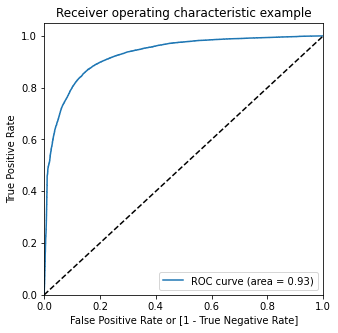

In [84]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

## Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.410486,0,0,1,1,1,1,1,0,0,0,0,0
1,0,0.058674,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.006350,2,0,1,0,0,0,0,0,0,0,0,0
3,0,0.353789,3,0,1,1,1,1,0,0,0,0,0,0
4,0,0.027537,4,0,1,0,0,0,0,0,0,0,0,0


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.722243  0.980625  0.463860
0.2   0.2  0.767913  0.967777  0.568049
0.3   0.3  0.801964  0.948506  0.655421
0.4   0.4  0.834265  0.922133  0.746396
0.5   0.5  0.854815  0.878160  0.831471
0.6   0.6  0.844292  0.777052  0.911531
0.7   0.7  0.783163  0.597295  0.969031
0.8   0.8  0.745900  0.509766  0.982035
0.9   0.9  0.737701  0.488876  0.986526


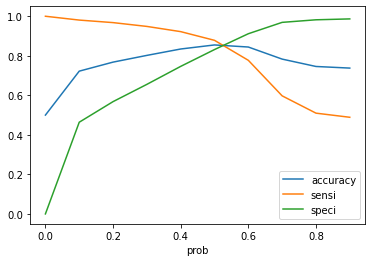

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.6 is the optimum point to take it as a cutoff probability.

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.6 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.410486,0,0,1,1,1,1,1,0,0,0,0,0,0
1,0,0.058674,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.006350,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.353789,3,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.027537,4,0,1,0,0,0,0,0,0,0,0,0,0


In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8442918320451223

In [90]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[17454,  1694],
       [ 4269, 14879]], dtype=int64)

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7770524336745352

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.9115312304157092

In [94]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08846876958429079


In [95]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8977855548180776


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8034801822952631


### Precision and recall tradeoff

In [97]:
from sklearn.metrics import precision_recall_curve

In [98]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 38291    1
 38292    1
 38293    1
 38294    1
 38295    1
 Name: Churn, Length: 38296, dtype: int32,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 38291    1
 38292    1
 38293    1
 38294    1
 38295    1
 Name: predicted, Length: 38296, dtype: int64)

In [99]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

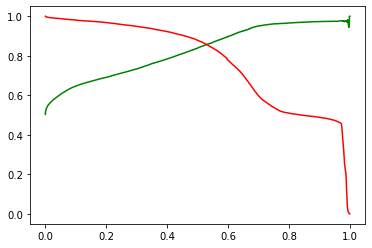

In [100]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Buliding the Second model with PCA

In [101]:
# Applying the PCA for the train set
from sklearn.decomposition import PCA

In [102]:
pca = PCA(random_state=42)

In [103]:
pca.fit(X_train_pca)

PCA(random_state=42)

In [104]:
pca.components_

array([[-1.30533381e-19,  5.55111512e-17, -1.11022302e-16, ...,
         3.31514590e-02,  1.24215351e-01, -2.96204194e-01],
       [ 2.18874540e-19, -1.11022302e-16, -5.55111512e-17, ...,
        -1.45686453e-02,  1.46205818e-01, -4.81411297e-02],
       [-4.32913640e-19, -0.00000000e+00, -2.77555756e-16, ...,
        -1.83531727e-02,  1.13487259e-01,  4.21323179e-01],
       ...,
       [-0.00000000e+00,  9.05099076e-02, -1.97614420e-01, ...,
         2.34187669e-17, -7.28583860e-17, -2.77555756e-17],
       [-0.00000000e+00,  2.30934856e-01, -4.36437428e-01, ...,
        -8.84708973e-17,  2.84494650e-16, -0.00000000e+00],
       [ 9.99999252e-01, -1.00630864e-03, -6.62412353e-04, ...,
        -4.06575815e-20, -1.84314369e-18,  8.13151629e-20]])

In [105]:
pca.explained_variance_ratio_

array([1.13915403e-01, 9.15015145e-02, 6.12927780e-02, 5.90408963e-02,
       4.35484463e-02, 4.07809638e-02, 3.89629106e-02, 3.27852608e-02,
       2.69488533e-02, 2.58217677e-02, 1.99571839e-02, 1.87150726e-02,
       1.78644288e-02, 1.75284062e-02, 1.64005155e-02, 1.57354179e-02,
       1.49366796e-02, 1.38494729e-02, 1.29156072e-02, 1.23060412e-02,
       1.17980581e-02, 1.09147325e-02, 9.97220197e-03, 9.43120280e-03,
       9.26390446e-03, 8.72622568e-03, 8.15732117e-03, 7.73483955e-03,
       7.44647520e-03, 7.39214988e-03, 7.21197890e-03, 7.15972664e-03,
       7.02115498e-03, 6.57501777e-03, 6.33208832e-03, 6.01582595e-03,
       5.95727800e-03, 5.84336615e-03, 5.50737671e-03, 5.44384410e-03,
       5.20693541e-03, 5.07643768e-03, 4.98458759e-03, 4.92549430e-03,
       4.65482861e-03, 4.50502145e-03, 4.40136275e-03, 4.20899147e-03,
       4.09227233e-03, 4.00194050e-03, 3.88116411e-03, 3.81796171e-03,
       3.74921909e-03, 3.54410317e-03, 3.47671247e-03, 3.38879426e-03,
      

In [106]:
import matplotlib.pyplot as plt

<BarContainer object of 138 artists>

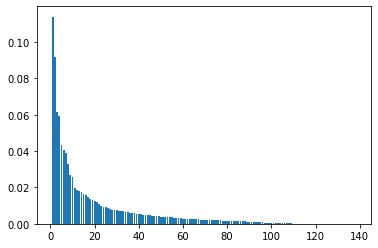

In [107]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [108]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

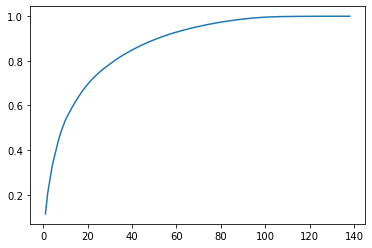

In [109]:
###Making the scree plot
plt.plot(range(1,len(var_cumu)+1), var_cumu)

#### From the above graph we can 60 components explain maximum varience

In [110]:
from sklearn.decomposition import IncrementalPCA

In [111]:
pc2 = IncrementalPCA(n_components=60)

In [112]:
df_train_pca = pc2.fit_transform(X_train_pca)

In [113]:
corrmat = np.corrcoef(df_train_pca.transpose())

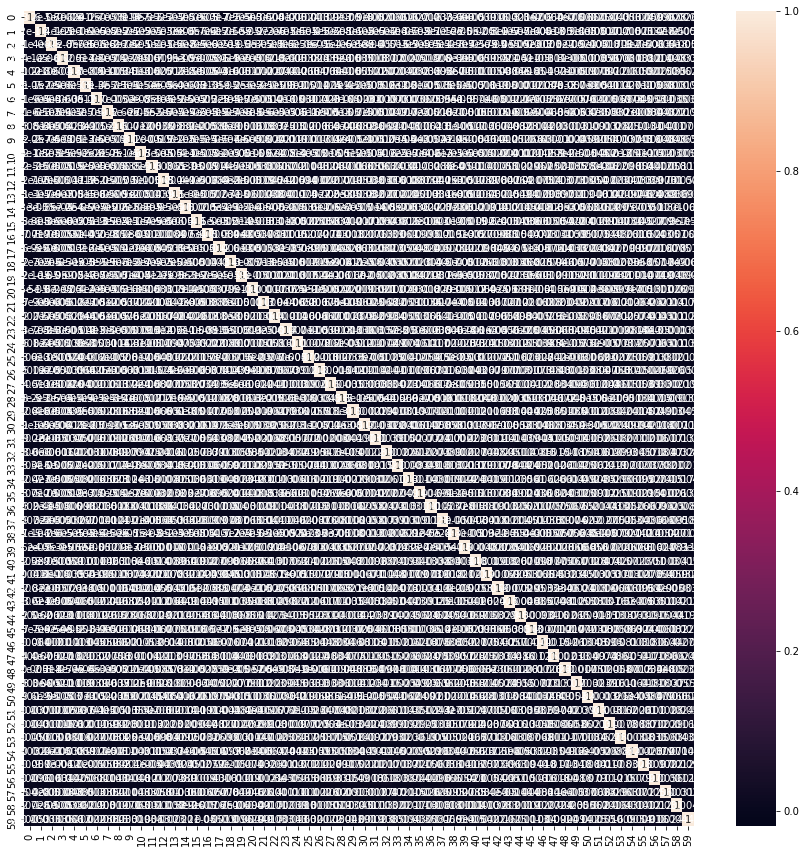

In [114]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [115]:
# Applying Logestic regression
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train_pca)

In [116]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [117]:
"{:2.2}".format(metrics.roc_auc_score(y_train_pca, pred_probs_train[:,1]))

'0.94'

## Making prediction on test data for MODEL 1

In [118]:
X_test[list_columns]= scaler.transform(X_test[list_columns])
X_test.shape

(9004, 138)

In [119]:
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

In [120]:
y_test_pred[:10]

29360    0.215698
49979    0.758078
90612    0.409377
87007    0.266158
91852    0.645332
28100    0.209666
69301    0.669446
50905    0.289940
31097    0.591128
83157    0.992272
dtype: float64

In [121]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [122]:
# Let's see the head
y_pred_1.head()

,0
29360,0.215698
49979,0.758078
90612,0.409377
87007,0.266158
91852,0.645332


In [123]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [124]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [125]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [126]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [127]:
y_pred_final.head()

,Target_value,CustID,0
0,0,29360,0.215698
1,0,49979,0.758078
2,0,90612,0.409377
3,0,87007,0.266158
4,0,91852,0.645332


In [128]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final

,Target_value,CustID,Churn_Prob
0,0,29360,0.215698
1,0,49979,0.758078
2,0,90612,0.409377
3,0,87007,0.266158
4,0,91852,0.645332
...,...,...,...
8999,0,21794,0.008976
9000,0,75969,0.284217
9001,0,97344,0.022073
9002,0,40248,0.485615


In [129]:
# Rearranging the columns
y_pred_final.columns =['Churn','CustID','Churn_Prob']

In [130]:
# Rearranging the columns
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 0 if x > 0.6 else 0)

In [131]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,0,29360,0.215698,0
1,0,49979,0.758078,0
2,0,90612,0.409377,0
3,0,87007,0.266158,0
4,0,91852,0.645332,0


In [132]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.9113727232341182

## Making prediction on test data with PCA for MODEL 2

In [133]:
df_test_pca = pc2.transform(X_test_pca)
df_test_pca.shape

(9004, 60)

In [134]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [135]:
"{:2.2}".format(metrics.roc_auc_score(y_test_pca, pred_probs_test[:,1]))

'0.82'

### Summary of Telecom Prediction Assignmet

- Model without PCA
    - Accuracy for Train -->84%
    - Accuracy for Test -->91%
- Model with PCA
    - Accuracy for Train -->94%
    - Accuracy for Test -->82%
    - The Accuracy is about 94% at train & 82% at Test.It means that the it has 95% chance of correctly handling a new unseen example. For this telecom churn problems, it is a not bad result at all.

- HVC :
    - `30011` Customer have the average amount more than 70th percentile
    - To retain these customer, need to pay more attension to their  feebacks and give more offers ,sploffer and custom benefits
 
- Important variables that are strong predictors of churn:
    - The below mentioedn vaiables are significant which satisfying both the P-value & Vif 
       `total_ic_mou_8`,`loc_ic_t2m_mou_8`,`loc_ic_mou_7`,`loc_ic_t2m_mou_6`,`arpu_8`,`std_og_mou_8`,`Action_Target_value`,`onnet_mou_7`,`last_day_rch_amt_9`,`monthly_2g_8`,`sep_vbc_3g`,`spl_ic_mou_8` 

## Therefore , using the above variables we can reduce customer churn and helps the telecom companies to predict which customers are at high risk of churn.
